# ***PREREQUISITES FOR THE WORKSHOP***

Here's a list of Libraries you need to familiarize with before starting the workshop<br>

It is alright if you face trouble understanding the contents of this notebook. We'll go over all the doubts doubts during the lab session.

1. PyTorch<br>
2. Keras<br>
3. Numpy<br>
4. Matplotlib<br>
5. Pandas<br>
6. Seaborn<br>
7. Sklearn<br>

#Important functions in **PyTorch** and their usage<br>
Transforms are common image transformations.<br>PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.

In [ ]:
#importing the libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

#Used in data preprocessing

train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),   # Resize the input image to the given size.
    torchvision.transforms.RandomHorizontalFlip(),    # Horizontally flip the given image randomly with a given probability
    torchvision.transforms.ToTensor(), #Convert a PIL Image or numpy.ndarray to tensor
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize a tensor image with mean and standard deviation. This transform does not support PIL Image
])


#At the heart of PyTorch data loading utility is the torch.utils.data.DataLoader class. It represents a Python iterable over a dataset
#DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, prefetch_factor=2, persistent_workers=False)

**TORCH.NN**<br>
These are the basic building blocks for graphs:

1.Conv1D Layer :<br>

 **CLASS - torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)**<br>
 
Applies a 1D convolution over an input signal composed of several input planes.<br>

Parameters to focus on:

**stride** controls the stride for the cross-correlation, a single number or a one-element tuple.

**padding:** controls the amount of padding applied to the input. It can be either a string {‘valid’, ‘same’} or a tuple of ints giving the amount of implicit padding applied on both sides.


**groups:** controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example,

1. At groups=1, all inputs are convolved to all outputs.

2. At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels and producing half the output channels, and both subsequently concatenated.

3. At groups= in_channels, each input channel is convolved with its own set of import torch.nn as nn filters.

In [ ]:
import torch.nn as nn
import torch
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

2.Conv2D Layer<br>
**CLASS - torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)**<br>

Applies a 2D convolution over an input signal composed of several input planes.

In [ ]:
import torch.nn as nn
import torch
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)

3.Linear Layer(Dense) <br>
**CLASS<br>
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)**<br>
Applies a linear transformation to the incoming data: y = xA^T + by=xA 
T
 +b

*Optimizer, Criterion, Loss functions*<br>
**torch.optim** is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.<br><br>
To construct an Optimizer you have to give it an iterable containing the parameters (all should be Variable) to optimize. Then, you can specify optimizer-specific options such as the learning rate, weight decay, etc.


Example: <br>
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)<br>
optimizer = optim.Adam([var1, var2], lr=0.0001)

*   Optimizer.zero_grad(set_to_none=False)<br>Sets the gradients of all optimized torch.Tensor to zero<br>
Parameters
set_to_none (bool) – instead of setting to zero, set the grads to None. This will in general have lower memory footprint, and can modestly improve performance.
* Optimizer.step(closure)<br>
Performs a single optimization step (parameter update).
<br>Parameters
closure (callable) – A closure that reevaluates the model and returns the loss. Optional for most optimizers.

Loss & Criterion


In [8]:
import math

criterion = nn.CrossEntropyLoss()

probs = [math.log(p) for p in [0.9, 0.8, 0.7]]
outputs = torch.tensor([probs], requires_grad=True)
labels = torch.tensor([0], dtype=torch.long)
loss = criterion(outputs, labels)

print('outputs: ', outputs)
print('labels: ', labels)
print('loss: ', loss)

outputs:  tensor([[-0.1054, -0.2231, -0.3567]], requires_grad=True)
labels:  tensor([0])
loss:  tensor(0.9808, grad_fn=<NllLossBackward>)


# Important functions in **Numpy** and their usage<br>
In Python we have lists that serve the purpose of arrays, but they are slow to process.<br>
NumPy aims to provide an array object that is up to **50x faster than traditional Python lists**.<br>
The array object in NumPy is called **ndarray**

In [ ]:
import numpy as np
#declaring an array
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [ ]:
#create an array filled with 0’s
np.zeros(2)

array([0., 0.])

In [ ]:
#making a multi-dimensional array of zeros
np_array = np.zeros((2, 3))
np_array

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
#Clip (limit) the values in an array
np.clip(x, 1, 2)

array([1, 2, 2])

#Important functions in **Matplotlib** and their usage<br>
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits

In [ ]:
import matplotlib.pyplot as plt
#figure([num, figsize, dpi, facecolor, ...]) -	Create a new figure, or activate an existing figure.
plt.figure(figsize=(8, 4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

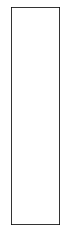

In [ ]:
#subplot(\*args, \*\*kwargs)	Add an Axes to the current figure or retrieve an existing Axes.
plt.subplot(1, 6, 1, xticks=[], yticks=[])

In [ ]:
#imshow()	Display data as an image, i.e., on a 2D regular raster.
def show_images(images):
    plt.imshow(image)

In [ ]:
import matplotlib.pyplot as plt	
plt.xticks(rotation = 90) #Get or set the current tick locations and labels of the x-axis.
plt.margins(x=0) #Set or retrieve autoscaling margins
plt.ylim(10,80) #Get or set the y-limits of the current axes
plt.show() #Display all open figures

plt.title() - Set a title for the Axes<br>
plt.plot() - Plot y versus x as lines and/or markers

#Important functions in **Seaborn** and their usage

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

In [ ]:
import seaborn as sns #To draw a line plot using long-form data, assign the x and y variables
count=0
count_dict = {}
sns.lineplot(x = list(count_dict.keys()), y = list(count_dict.values())).set_title('xyz')

# Important functions in **Pandas** and their usage

Pandas are effective in handling large amount of data and are made over Numpy hence are really effective and fast

In [ ]:
# Import pandas library
import pandas as pd

#creating a series
s = pd.Series([1, 3, 5, np.nan, 6, 8])

# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
#viewing data
print(df.head())
print(df.tail())

#selecting data

print(df["Age"])
print(df[0:3])


#Selecting on a multi-axis by label:

df.loc[:, ["Name", "Age"]]


#Selection by position

df.iloc[3]
df.iloc[3:5, 0:2]

#Important functions in **Sklearn** and their usage<br>
Scikit-learn (Sklearn) provides a selection of efficient tools for machine learning and statistical modeling. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

Split arrays or matrices into random train and test subsets<br>
Syntax:<br>
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)<br>


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
list(y)
[0, 1, 2, 3, 4]
train_test_split(y, shuffle=False) 

[[0, 1, 2], [3, 4]]